# Cross Validation in `Python`

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.utils import resample
from sklearn.neighbors import NearestNeighbors

In [3]:
Data = pd.read_csv('House_Price_Regression.csv')

Data = Data.loc[:, ['no_of_bedrooms' , 'no_of_bathrooms', 'latitude', 'longitude', 'price', 'size_in_m_2', 'balcony_recode', 'private_garden_recode', 'quality_recode']]

Data.head()

,no_of_bedrooms,no_of_bathrooms,latitude,longitude,price,size_in_m_2,balcony_recode,private_garden_recode,quality_recode
0,1,2,25.113208,55.138932,2700000,100.242337,1.0,0.0,2.0
1,2,2,25.106809,55.151201,2850000,146.972546,1.0,0.0,2.0
2,3,5,25.063302,55.137728,1150000,181.253753,1.0,0.0,2.0
3,2,3,25.227295,55.341761,2850000,187.664060,1.0,0.0,1.0
4,0,1,25.114275,55.139764,1729200,47.101821,0.0,0.0,2.0


## Not random simple validation

In [4]:
def simple_validation_not_random(D, k, response, metric, model):

    # D --> have to be a pandas data frame.

    # k --> is the proportion of observation of D that define D_train.

    # response --> have to be a string with the name of the response variable.

    N = len(D)

    D_train = D.iloc[0:(math.floor(k*N)+1) , :]

    D_test = D.iloc[(math.floor(k*N)+1):N , :]

    X_train = D_train.loc[: , D_train.columns != response]
    Y_train = D_train.loc[: , response]

    X_test = D_test.loc[: , D_test.columns != response]
    Y_test = D_test.loc[: , response]

############################################################################

    # Training the model wit train sample

    model.fit(X_train, Y_train)

    # Making predictions with test sample

    Y_predict_test = model.predict( X_test )     

############################################################################

 # Computing the test metric

    if metric == 'ECM' :  
        
        ECM_test = np.mean( (Y_predict_test - Y_test)**2 )

        return ECM_test

    elif metric == 'TA' :  
        
        TA_test = np.mean( (Y_predict_test == Y_test) )

        return TA_test

In [5]:
knn_regression = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10 ,  p=2, metric='minkowski')

In [6]:
ECM_test_Simple_Validation_not_random  = simple_validation_not_random(D=Data, k=0.75, response='price', metric='ECM', model=knn_regression)

ECM_test_Simple_Validation_not_random

2176125958588.6355

In [7]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  p=2, metric='minkowski')

In [8]:
TAC_test_Simple_Validation_not_random  = simple_validation_not_random(D=Data, k=0.75, response='quality_recode', metric='TA', model=knn_classification)

TAC_test_Simple_Validation_not_random

0.5609243697478992

## Random simple validation

In [9]:
def simple_validation_random(D, k, response, random_seed, metric, model):

    # D --> have to be a pandas data frame.

    # k --> is the proportion of observation of D that define D_train.

    # response --> have to be a string with the name of the response variable.

    # random_seed --> seed to replicate the random process

    N = len(D)

    D_train = D.sample(frac=k, replace=False, random_state=random_seed)

    D_test = D.drop( D_train.index , )

    X_train = D_train.loc[: , D_train.columns != response]
    Y_train = D_train.loc[: , response]

    X_test = D_test.loc[: , D_test.columns != response]
    Y_test = D_test.loc[: , response]

############################################################################

    # Training the model wit train sample

    model.fit(X_train, Y_train)

    # Making predictions with test sample

    Y_predict_test = model.predict( X_test ) 

####################################################################

 # Computing the test metric

    if metric == 'ECM' :  
        
        ECM_test = np.mean( (Y_predict_test - Y_test)**2 )

        return ECM_test

    elif metric == 'TA' :  
        
        TA_test = np.mean( (Y_predict_test == Y_test) )

        return TA_test

In [10]:
knn_regression = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10 ,  p=2, metric='minkowski')

In [11]:
ECM_test_Simple_Validation_random = simple_validation_random(D=Data, k=0.75, response='price', random_seed=123, metric='ECM', model=knn_regression)

ECM_test_Simple_Validation_random

2464363295205.937

In [12]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  p=2, metric='minkowski')

In [13]:
TAC_test_Simple_Validation_random = simple_validation_random(D=Data, k=0.75, response='quality_recode', random_seed=123, metric='TA', model =knn_classification)

TAC_test_Simple_Validation_random

0.5777310924369747

## Repeated random simple validation

In [14]:
def repeated_random_simple_validation(D, k, B, response, random_seed, metric, model):

    # D --> have to be a pandas data frame.

    # k --> is the proportion of observation of D that define D_train.

    # B --> number of replications of the random simple validation algorithm

    # response --> have to be a string with the name of the response variable.

    # random_seed --> seed to replicate the random process


    np.random.seed(random_seed)

    ECM_test_list , TA_test_list = [ ] , [ ]

    seed_array = np.random.randint(9999999, size=(B))


    if metric == 'ECM':

        for b in range(0,B) :

            ECM_test_list.append( simple_validation_random(D, k, response, random_seed=seed_array[b], metric=metric, model=model) )


        ECM_test = np.mean(ECM_test_list)    

        return ECM_test 


    elif metric == 'TA':

        for b in range(0,B) :

            TA_test_list.append( simple_validation_random(D, k, response, random_seed=seed_array[b], metric=metric, model=model) )


        TA_test = np.mean(TA_test_list)    

        return TA_test 

In [15]:
knn_regression = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10 ,  p=2, metric='minkowski')

In [16]:
ECM_test_Simple_Validation_repeated = repeated_random_simple_validation(D=Data, k=0.75, B=1000, response='price', random_seed=123, metric='ECM', model=knn_regression)

Time: 14.4seg

In [17]:
ECM_test_Simple_Validation_repeated

2297076499859.55

In [18]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  p=2, metric='minkowski')

In [19]:
TAC_test_Simple_Validation_repeated = repeated_random_simple_validation(D=Data, k=0.75, B=1000, response='quality_recode', random_seed=123, metric='TA', model=knn_classification)

Time: 43 seg

In [20]:
TAC_test_Simple_Validation_repeated

0.5516638655462184

## Leave one out

In [21]:
def leave_one_out_validation(D, response, metric, model):

    # D --> have to be a pandas data frame.

    # k --> is the proportion of observation of D that define D_train.

    # response --> have to be a string with the name of the response variable.

    ECM_test_list , TA_test_list = [ ] , [ ]

    N = len(D)

    for r in range(0,N):

        D_test = D.iloc[r,:]
        D_train = D.drop( r , )

        X_train = D_train.loc[: , D_train.columns != response]
        Y_train = D_train.loc[: , response]

        X_test = D_test.loc[D_test.index != response]
        Y_test = D_test.loc[response]

############################################################################

        # Training the model wit train sample

        model.fit(X_train, Y_train)

        # Making predictions with test sample

        Y_predict_test = model.predict( pd.DataFrame([X_test]) ) 
        
############################################################################

        if metric == 'ECM' :  ECM_test_list.append( np.mean( (Y_predict_test - Y_test)**2 ) )
    
        elif metric == 'TA' :  TA_test_list.append( np.mean( (Y_predict_test == Y_test ) ) )

############################################################################
        
    if metric == 'ECM' : 
        
        ECM_test = np.mean(ECM_test_list)

        return ECM_test


    elif metric == 'TA' :

        TA_test = np.mean(TA_test_list)

        return TA_test


In [22]:
knn_regression = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10 ,  p=2, metric='minkowski')

In [23]:
ECM_test_leave_one_out = leave_one_out_validation(D=Data, response='price', metric='ECM', model=knn_regression)

Time: 24seg

In [24]:
ECM_test_leave_one_out

2268581861335.2305

In [25]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  p=2, metric='minkowski')

In [26]:
TAC_test_leave_one_out = leave_one_out_validation(D=Data, response='quality_recode', metric='TA', model=knn_classification)

TAC_test_leave_one_out

0.5511811023622047

Time: 26seg

# K Folds

In [27]:
def K_Fold_CV(D, K, response, random_seed, metric, model):

    ECM_K_FOLDS_vector , TA_K_FOLDS_vector = [] , []

    np.random.seed(random_seed)

    sample = resample(range(0, len(D)), n_samples=len(D), replace=False)

    df_sample = pd.DataFrame({'index': range(0,len(D)) , 'sample':sample})

    Q = []

    for q in np.arange(0 , 1 + 1/K , 1/K):

        Q.append( np.quantile( range(0, len(D)) , q ).round(0) )


    for j in range(0, len(Q)-1):

            X_test = D.loc[df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] , D.columns != response ] 
            Y_test = D.loc[df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] , D.columns == response ]

            X_train = D.loc[ : , D.columns != response ].drop(df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] )
            Y_train = D.loc[ : ,  D.columns == response ].drop(df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'])
            
            Y_test = Y_test.to_numpy()

           #########################################################################

            if model == 'knn_regression' :

              # Training the model wit train sample

                knn_regression.fit(X_train, Y_train)


               # Making predictions with test sample

                Y_predict_test = knn_regression.predict( X_test ) 

    
            elif model == 'knn_classification' :

               # Training the model wit train sample

                knn_classification.fit(X_train, Y_train)


               # Making predictions with test sample

                Y_predict_test = knn_classification.predict( X_test )  

            #########################################################################

            if metric == 'ECM' :  ECM_K_FOLDS_vector.append( np.mean( ( Y_predict_test - Y_test )**2 ) )

            elif metric == 'TA' :  TA_K_FOLDS_vector.append( np.mean( ( Y_predict_test == Y_test ) ) )

##################################################################################################################################################

    if metric == 'ECM' :

        ECM_K_Folds = np.mean(ECM_K_FOLDS_vector)
    
        return  ECM_K_Folds

    
    elif metric == 'TA' :

        TA_K_Folds = np.mean(TA_K_FOLDS_vector)
    
        return  TA_K_Folds

In [28]:
knn_regression = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10 ,  p=2, metric='minkowski')

In [29]:
ECM_K_Folds = K_Fold_CV(D=Data, response='price', K=10, random_seed=123, metric='ECM', model='knn_regression')

Time: 0.3seg

In [30]:
ECM_K_Folds

2220503635404.005

In [31]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  p=2, metric='minkowski')

In [32]:
TAC_K_Folds = K_Fold_CV(D=Data, response='quality_recode', K=10, random_seed=123, metric='TA', model='knn_classification')

TAC_K_Folds

0.5363984159477089

Time: 0.5 seg

## Repeated k-folds

In [33]:
def repeated_K_Fold_CV(D, B, K, response, random_seed, metric, model):


    ECM_Repeted_K_Folds_vector , TA_Repeted_K_Folds_vector = [] , []

    np.random.seed(random_seed)


    for b in range(0, B):

        sample = resample(range(0, len(D)), n_samples=len(D), replace=False)

        df_sample = pd.DataFrame({'index': range(0,len(D)) , 'sample':sample})

        
        Q = []

        
        for q in np.arange(0 , 1 + 1/K , 1/K):

            Q.append( np.quantile( range(0, len(D)) , q ).round(0) )



        ECM_K_FOLDS_vector , TA_K_FOLDS_vector = [] , []

        for j in range(0, len(Q)-1):

            X_test = D.loc[df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] , D.columns != response ] 
            Y_test = D.loc[df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] , D.columns == response ]

            X_train = D.loc[ : , D.columns != response ].drop(df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] )
            Y_train = D.loc[ : ,  D.columns == response ].drop(df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'])      

            Y_test = Y_test.to_numpy()

        #######################################################################
            
            if model == 'knn_regression' :

              # Training the model wit train sample

                knn_regression.fit(X_train, Y_train)


               # Making predictions with test sample

                Y_predict_test = knn_regression.predict( X_test ) 

    
            elif model == 'knn_classification' :

               # Training the model wit train sample

                knn_classification.fit(X_train, Y_train)


               # Making predictions with test sample

                Y_predict_test = knn_classification.predict( X_test )  

        #######################################################################

            if metric == 'ECM' :  ECM_K_FOLDS_vector.append( np.mean( ( Y_predict_test - Y_test )**2 ) )

            elif metric == 'TA' :  TA_K_FOLDS_vector.append( np.mean( ( Y_predict_test == Y_test ) ) )

        #######################################################################
    
        if metric == 'ECM' : ECM_Repeted_K_Folds_vector.append( np.mean(ECM_K_FOLDS_vector) )

        elif metric == 'TA' : TA_Repeted_K_Folds_vector.append( np.mean(TA_K_FOLDS_vector) )

##########################################################################################################################

    if metric == 'ECM' :
        
        ECM_Repeted_K_Folds = np.mean(ECM_Repeted_K_Folds_vector)

        return  ECM_Repeted_K_Folds
        

    elif metric == 'TA' :
        
        TA_Repeted_K_Folds = np.mean(TA_Repeted_K_Folds_vector)

        return  TA_Repeted_K_Folds
    
    

In [34]:
knn_regression = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10 ,  p=2, metric='minkowski')

In [35]:
ECM_repeated_K_Folds = repeated_K_Fold_CV(D=Data, response='price', K=10, B=100, random_seed=123, metric='ECM', model='knn_regression')

Time: 19seg

In [36]:
ECM_repeated_K_Folds

2268486279605.6816

In [37]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  p=2, metric='minkowski')

In [38]:
TAC_repeated_K_Folds = repeated_K_Fold_CV(D=Data, response='quality_recode', K=10, B=100, random_seed=123, metric='TA', model='knn_classification')

Time:30seg

In [39]:
TAC_repeated_K_Folds

0.5371267212075105

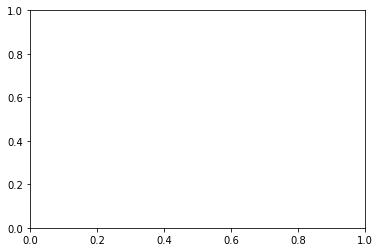

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
ECM_df = pd.DataFrame({'ECM' : [ECM_test_Simple_Validation_not_random , ECM_test_Simple_Validation_random, ECM_test_Simple_Validation_repeated, ECM_test_leave_one_out, ECM_K_Folds, ECM_repeated_K_Folds],
 'names' : ['Simple validation (not random)' , 'Simple validation (random)', 'Simple validation (repeted)', 'Leave one out', 'k-folds', 'repeted-k-folds']})

In [42]:
TAC_df = pd.DataFrame({'TAC' : [TAC_test_Simple_Validation_not_random , TAC_test_Simple_Validation_random, TAC_test_Simple_Validation_repeated, TAC_test_leave_one_out, TAC_K_Folds, TAC_repeated_K_Folds],
 'names' : ['Simple validation (not random)' , 'Simple validation (random)', 'Simple validation (repeted)', 'Leave one out', 'k-folds', 'repeted-k-folds']})

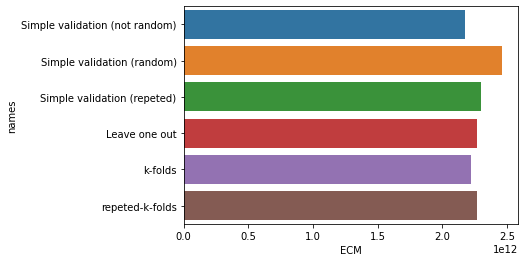

In [43]:
p1 = sns.barplot(x="ECM", y ='names' , data=ECM_df)

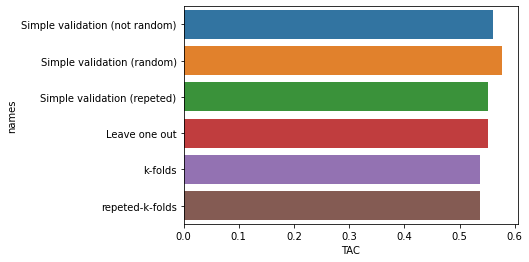

In [44]:
p2 = sns.barplot(x="TAC", y ='names' , data=TAC_df)

In [45]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import KFold

In [46]:
cv_k_fold = KFold(n_splits=10, random_state=123, shuffle=True)

cv_repeated_k_fold = RepeatedKFold(n_splits=10, n_repeats=100, random_state=123)

In [47]:
Y = Data.loc[:,'price']

In [48]:
X = Data.loc[:, Data.columns != 'price']

In [49]:
Y.head()

0    2700000
1    2850000
2    1150000
3    2850000
4    1729200
Name: price, dtype: int64

In [50]:
X.head()

,no_of_bedrooms,no_of_bathrooms,latitude,longitude,size_in_m_2,balcony_recode,private_garden_recode,quality_recode
0,1,2,25.113208,55.138932,100.242337,1.0,0.0,2.0
1,2,2,25.106809,55.151201,146.972546,1.0,0.0,2.0
2,3,5,25.063302,55.137728,181.253753,1.0,0.0,2.0
3,2,3,25.227295,55.341761,187.664060,1.0,0.0,1.0
4,0,1,25.114275,55.139764,47.101821,0.0,0.0,2.0


In [51]:
ECM_K_Folds_sklearn = cross_val_score(knn_regression, X, Y, cv=cv_k_fold, scoring='neg_mean_squared_error')

In [52]:
ECM_K_Folds_sklearn = np.mean( - ECM_K_Folds_sklearn )

In [53]:
ECM_K_Folds_sklearn

2220103512647.2095

In [54]:
ECM_repeated_K_Folds_sklearn = cross_val_score(knn_regression, X, Y, cv=cv_repeated_k_fold, scoring='neg_mean_squared_error')

In [55]:
ECM_repeated_K_Folds_sklearn = np.mean( - ECM_repeated_K_Folds_sklearn )

In [56]:
ECM_repeated_K_Folds_sklearn

2269036673148.278

In [57]:
ECM_df = pd.DataFrame({'ECM' : [ECM_test_Simple_Validation_not_random , ECM_test_Simple_Validation_random, ECM_test_Simple_Validation_repeated, ECM_test_leave_one_out, ECM_K_Folds, ECM_K_Folds_sklearn , ECM_repeated_K_Folds, ECM_repeated_K_Folds_sklearn],
 'names' : ['Simple validation (not random)' , 'Simple validation (random)', 'Simple validation (repeted)', 'Leave one out', 'k-folds', 'k-folds (sklearn)', 'repeted-k-folds', 'repeted-k-folds (sklearn)']})

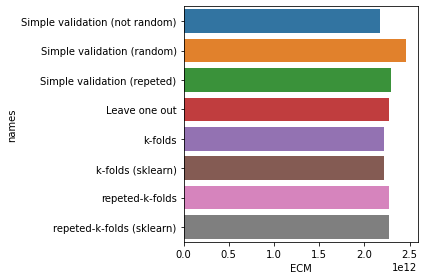

In [72]:
fig, ax = plt.subplots()

p3 = sns.barplot(x="ECM", y ='names' , data=ECM_df)

plt.tight_layout()

fig.savefig('p3.jpg', format='jpg', dpi=1200)

In [59]:
Y = Data.loc[:,'quality_recode']

In [60]:
X = Data.loc[:, Data.columns != 'quality_recode']

In [61]:
TAC_K_Folds_sklearn = cross_val_score(knn_classification, X, Y, cv=cv_k_fold, scoring='accuracy')

In [62]:
TAC_K_Folds_sklearn = np.mean( TAC_K_Folds_sklearn )

In [63]:
TAC_K_Folds_sklearn

0.5606558280518048

In [64]:
TAC_repeated_K_Folds_sklearn = cross_val_score(knn_classification, X, Y, cv=cv_repeated_k_fold, scoring='accuracy')

In [65]:
TAC_repeated_K_Folds_sklearn = np.mean( TAC_repeated_K_Folds_sklearn )

In [66]:
TAC_repeated_K_Folds_sklearn

0.554644943510609

In [67]:
TAC_df = pd.DataFrame({'TAC' : [TAC_test_Simple_Validation_not_random , TAC_test_Simple_Validation_random, TAC_test_Simple_Validation_repeated, TAC_test_leave_one_out, TAC_K_Folds, TAC_K_Folds_sklearn, TAC_repeated_K_Folds, TAC_repeated_K_Folds_sklearn],
 'names' : ['Simple validation (not random)' , 'Simple validation (random)', 'Simple validation (repeted)', 'Leave one out', 'k-folds', 'k-folds (sklearn)', 'repeted-k-folds', 'repeted-k-folds (sklearn)']})

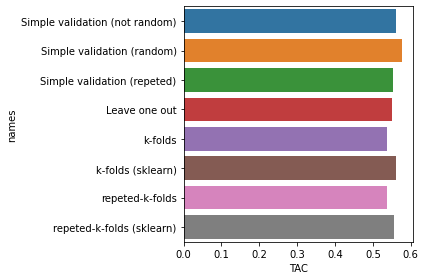

In [71]:
fig, ax = plt.subplots()

p4 = sns.barplot(x="TAC", y ='names' , data=TAC_df)

plt.tight_layout()

fig.savefig('p4.jpg', format='jpg', dpi=1200)